In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings("ignore")

In [3]:
# Readind data
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')
liar_train = pd.read_csv('LIAR_train.csv',encoding = 'latin-1')
liar_test = pd.read_csv('LIAR_test.csv',encoding = 'latin-1')
liar_val = pd.read_csv("LIAR_val.csv",encoding = 'latin-1') 

In [4]:
# Dataset containing fake news
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
# Dataset containing True news
true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
liar_train

,Label,Title,type,Author,1,2,3,4,5,6,7,8,9
0,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10265,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10266,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10267,FALSE,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [7]:
liar_val

,Label,Title,Type,author,1,2,3,4,5,6,7,8,9
0,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,FALSE,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70,71,160,163,9,a press conference
1280,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,a speech on the economy
1281,TRUE,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0,1,0,2,0,a television ad
1282,FALSE,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1,4,4,1,0,an Internet ad.


In [8]:
liar_test

,Label,Title,Type,Author,1,2,3,4,5,6,7,8,9
0,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,Radio interview
1,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,0.0,0.0,0.0,a news conference
2,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,comments on ABC's This Week.
3,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1.0,1.0,3.0,1.0,1.0,a radio show
4,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5.0,7.0,2.0,2.0,7.0,a web video
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28.0,23.0,38.0,34.0,7.0,a news conference
1279,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2.0,0.0,0.0,1.0,0.0,"on ABC's ""This Week"""
1280,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1.0,0.0,0.0,0.0,0.0,a commentary in The Providence Journal
1281,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference


In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [11]:
liar_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10269 entries, 0 to 10268
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   10269 non-null  object 
 1   Title   10269 non-null  object 
 2   type    10263 non-null  object 
 3   Author  10263 non-null  object 
 4   1       7363 non-null   object 
 5   2       8055 non-null   object 
 6   3       10263 non-null  object 
 7   4       10263 non-null  float64
 8   5       10263 non-null  float64
 9   6       10263 non-null  float64
 10  7       10263 non-null  float64
 11  8       10263 non-null  float64
 12  9       10163 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


In [12]:
liar_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1284 non-null   object
 1   Title   1284 non-null   object
 2   Type    1284 non-null   object
 3   author  1284 non-null   object
 4   1       939 non-null    object
 5   2       1005 non-null   object
 6   3       1284 non-null   object
 7   4       1284 non-null   int64 
 8   5       1284 non-null   int64 
 9   6       1284 non-null   int64 
 10  7       1284 non-null   int64 
 11  8       1284 non-null   int64 
 12  9       1272 non-null   object
dtypes: int64(5), object(8)
memory usage: 130.5+ KB


In [13]:
liar_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Label   1283 non-null   object 
 1   Title   1283 non-null   object 
 2   Type    1281 non-null   object 
 3   Author  1281 non-null   object 
 4   1       953 non-null    object 
 5   2       1018 non-null   object 
 6   3       1281 non-null   object 
 7   4       1281 non-null   float64
 8   5       1281 non-null   float64
 9   6       1281 non-null   float64
 10  7       1281 non-null   float64
 11  8       1281 non-null   float64
 12  9       1264 non-null   object 
dtypes: float64(5), object(8)
memory usage: 130.4+ KB


In [14]:
# Deleting the remaining columns 
fake['Title'] = fake['title']
fake.drop(['title','subject','date','text'],axis=1,inplace=True)    


In [15]:
true['Title'] = true['title']
true.drop(['title','subject','date','text'],axis=1,inplace=True)


In [16]:
liar_train.drop(['1','2','3','4','5','6','7','8','9','Author','type'],axis=1,inplace=True)
liar_test.drop(['1','2','3','4','5','6','7','8','9','Author','Type'],axis=1,inplace=True)
liar_val.drop(['1','2','3','4','5','6','7','8','9','author','Type'],axis=1,inplace=True)

In [17]:
# defining a function to change the labels in the Liar datasets to binary classification 

def label(df):
    for i  in range(0,len(df)):
        if df['Label'][i] == 'barely-true' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'pants-fire' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'FALSE' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'half-true' :
            df['Label'][i] = int(0)
        if df['Label'][i] == 'TRUE' :
            df['Label'][i] = int(1)
        if df['Label'][i] == 'mostly-true' :
            df['Label'][i] = int(1)

In [18]:
label(liar_test)
label(liar_val)
label(liar_train)  

In [19]:
liar1 = pd.concat([liar_train,liar_val,liar_test])
liar1.reset_index(drop=True,inplace=True)
liar_fake = liar1[liar1['Label'] == 0] 
liar_true = liar1[liar1['Label'] == 1]
liar_fake.reset_index(inplace=True,drop=True)
liar_true.reset_index(inplace=True,drop=True)

In [20]:
# Adding new column to fake news dataset which labels the fake news as 0 
    
label_fake=[]
for i in range(0,len(fake)):
    label_fake.append(0)
fake['label'] = label_fake    

In [21]:
# Adding new column to true news dataset which labels the true news as 1 

label_true =[]
for i  in range(0,len(true)):
    label_true.append(1)
true['label'] = label_true

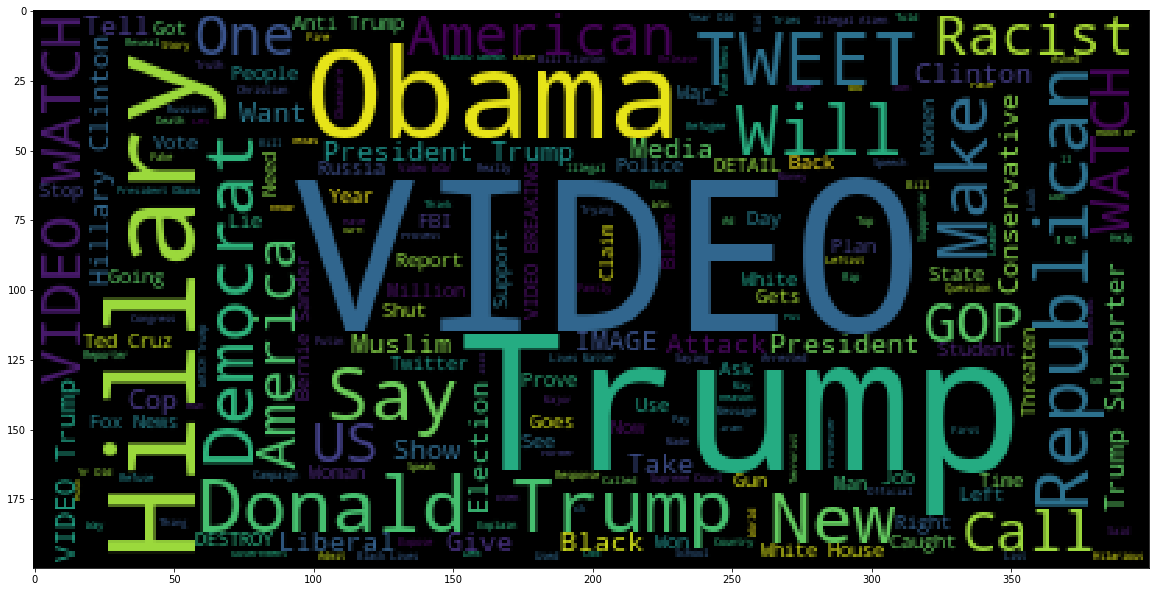

In [22]:
# Plotting wordcloud for the fake news

sent = fake['Title'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sent_joined))

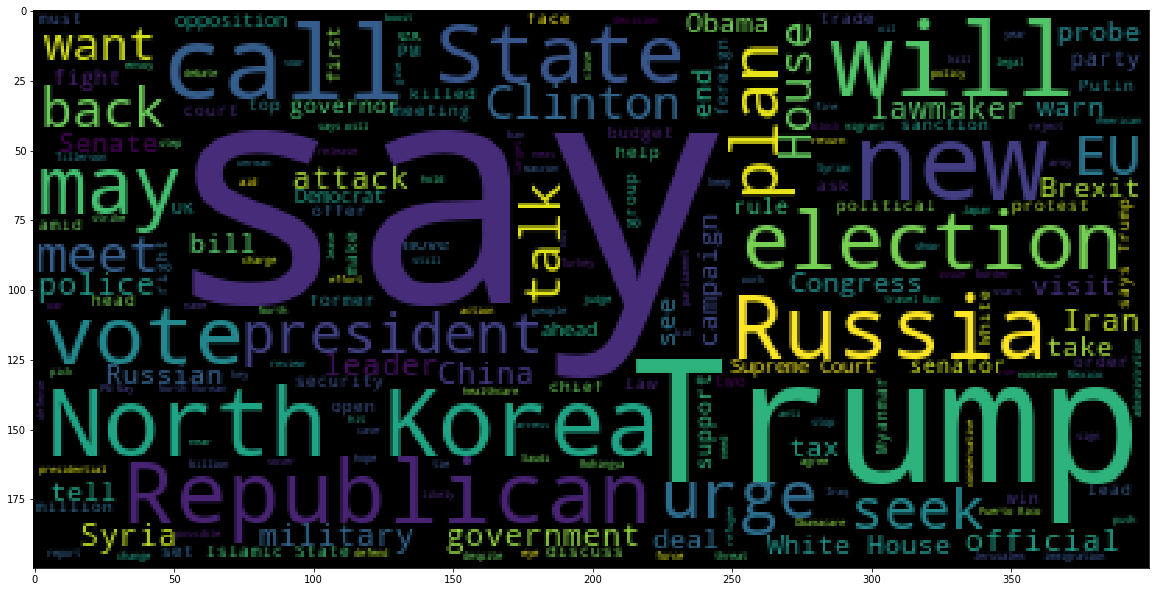

In [23]:
# Plotting wordcloud for the true news

sent = true['Title'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sent_joined))

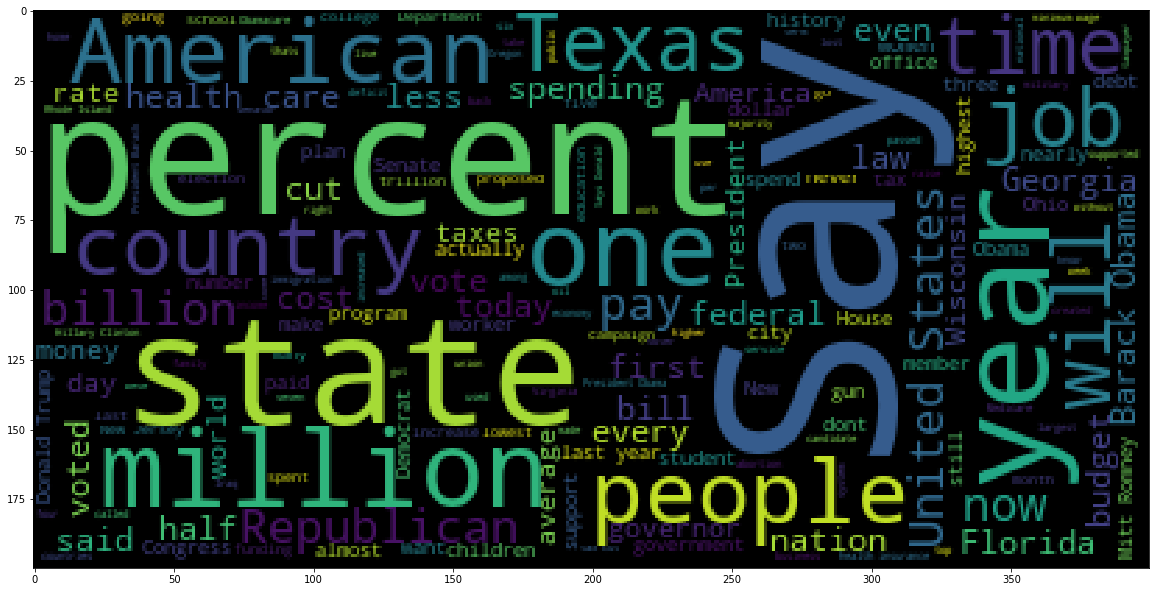

In [24]:
sent = liar_true['Title'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sent_joined))

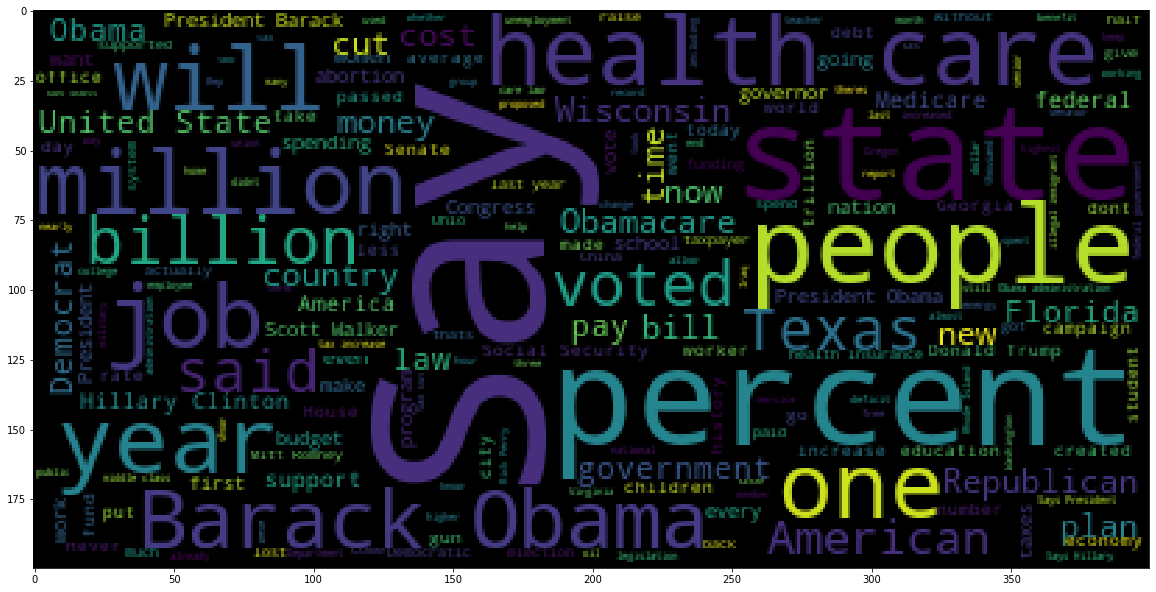

In [25]:
sent = liar_fake['Title'].tolist()
sent_joined = ''.join(sent)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sent_joined))

In [26]:
import nltk
from nltk import FreqDist,word_tokenize
from wordcloud import STOPWORDS
from nltk import bigrams
from nltk import trigrams
stopwords=set(STOPWORDS)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\afree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#Plotting the top 20 unigrams,bigrams and trigrams in fake news and true news

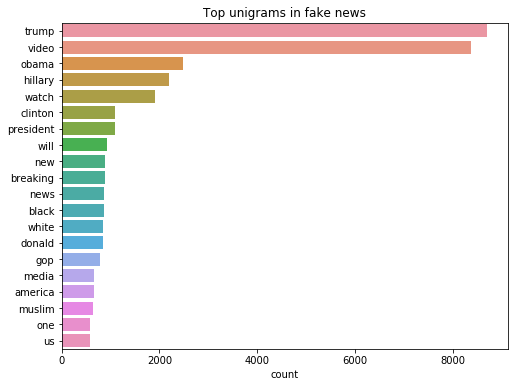

In [28]:
word_freq = FreqDist(w for w in word_tokenize(' '.join(fake['Title']).lower()) if 
                     (w not in stopwords) & (w.isalpha()) & (len(w)>1))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(top20w['count'], top20w.index)
plt.title('Top unigrams in fake news')
plt.show()

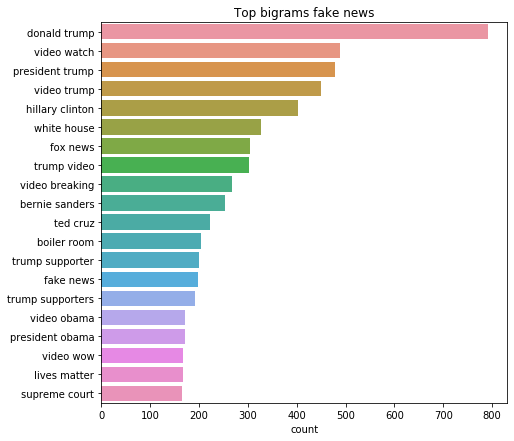

In [29]:
plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(fake['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(20)['count'], bgdf_d.index[:20])
plt.title('Top bigrams fake news')
plt.show()

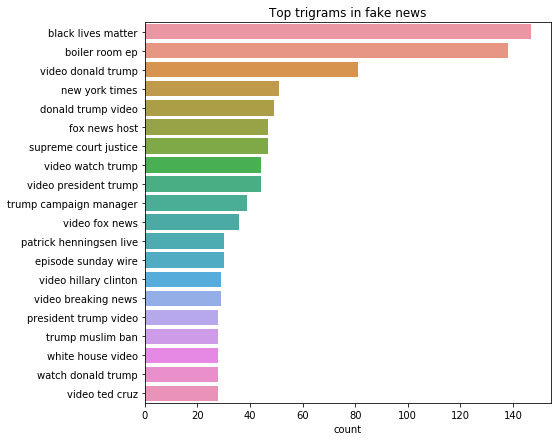

In [30]:
plt.figure(figsize=(16,7))
plt.subplot(121)
trigram_d = list(trigrams([w for w in word_tokenize(' '.join(fake['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(tg for tg in trigram_d)
tgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
tgdf_d.index = tgdf_d.index.map(lambda x: ' '.join(x))
tgdf_d = tgdf_d.sort_values('count',ascending=False)
sns.barplot(tgdf_d.head(20)['count'], tgdf_d.index[:20])
plt.title('Top trigrams in fake news')
plt.show()

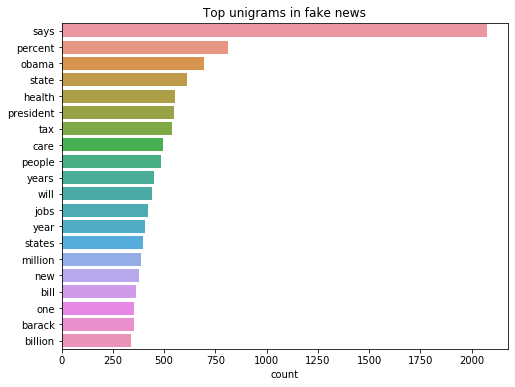

In [31]:
word_freq = FreqDist(w for w in word_tokenize(' '.join(liar_fake['Title']).lower()) if 
                     (w not in stopwords) & (w.isalpha()) & (len(w)>1))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(20)
plt.figure(figsize=(8,6))
sns.barplot(top20w['count'], top20w.index)
plt.title('Top unigrams in fake news')
plt.show()

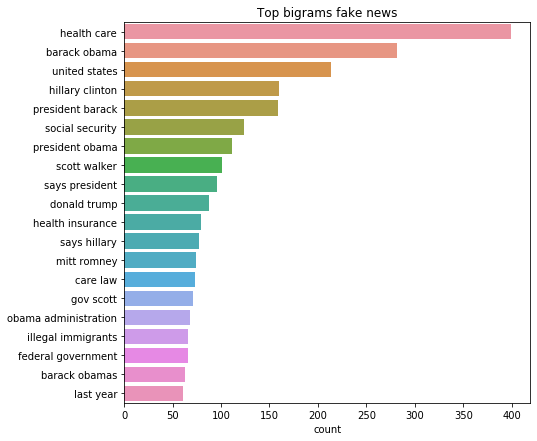

In [32]:
plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(liar_fake['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(20)['count'], bgdf_d.index[:20])
plt.title('Top bigrams fake news')
plt.show()

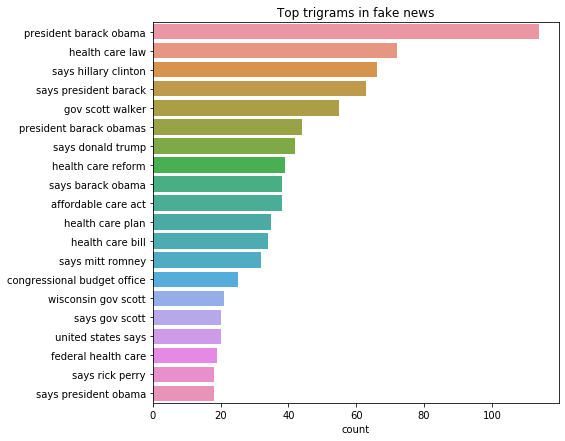

In [33]:
plt.figure(figsize=(16,7))
plt.subplot(121)
trigram_d = list(trigrams([w for w in word_tokenize(' '.join(liar_fake['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(tg for tg in trigram_d)
tgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
tgdf_d.index = tgdf_d.index.map(lambda x: ' '.join(x))
tgdf_d = tgdf_d.sort_values('count',ascending=False)
sns.barplot(tgdf_d.head(20)['count'], tgdf_d.index[:20])
plt.title('Top trigrams in fake news')
plt.show()

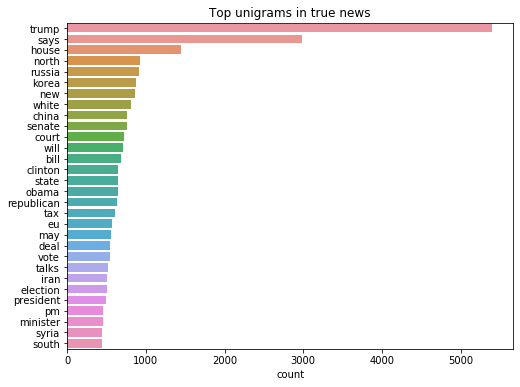

In [34]:
word_freq = FreqDist(w for w in word_tokenize(' '.join(true['Title']).lower()) if 
                     (w not in stopwords) & (w.isalpha()) & (len(w)>1))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(30)
plt.figure(figsize=(8,6))
sns.barplot(top20w['count'], top20w.index)
plt.title('Top unigrams in true news')
plt.show()

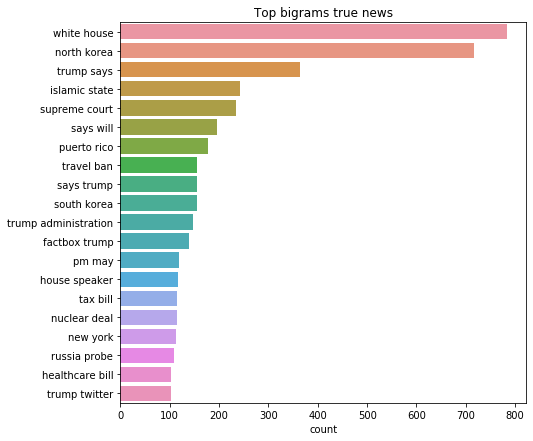

In [35]:
plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(true['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(20)['count'], bgdf_d.index[:20])
plt.title('Top bigrams true news')
plt.show()

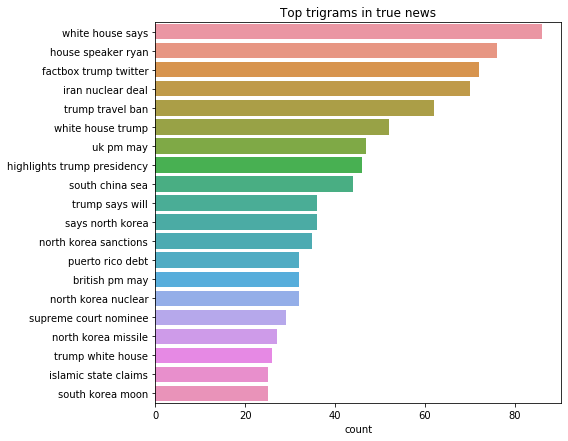

In [36]:
plt.figure(figsize=(16,7))
plt.subplot(121)
trigram_d = list(trigrams([w for w in word_tokenize(' '.join(true['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(tg for tg in trigram_d)
tgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
tgdf_d.index = tgdf_d.index.map(lambda x: ' '.join(x))
tgdf_d = tgdf_d.sort_values('count',ascending=False)
sns.barplot(tgdf_d.head(20)['count'], tgdf_d.index[:20])
plt.title('Top trigrams in true news')
plt.show()

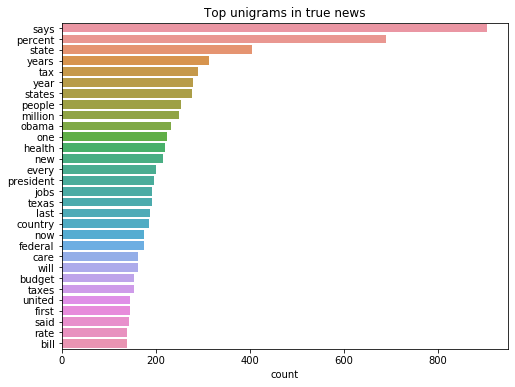

In [37]:
word_freq = FreqDist(w for w in word_tokenize(' '.join(liar_true['Title']).lower()) if 
                     (w not in stopwords) & (w.isalpha()) & (len(w)>1))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top20w = df_word_freq.sort_values('count',ascending=False).head(30)
plt.figure(figsize=(8,6))
sns.barplot(top20w['count'], top20w.index)
plt.title('Top unigrams in true news')
plt.show()

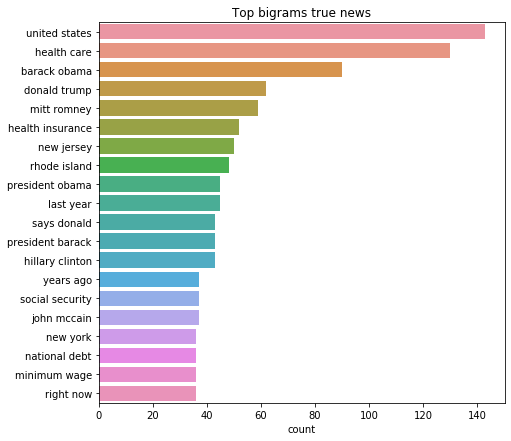

In [38]:
plt.figure(figsize=(16,7))
plt.subplot(121)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(liar_true['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(20)['count'], bgdf_d.index[:20])
plt.title('Top bigrams true news')
plt.show()

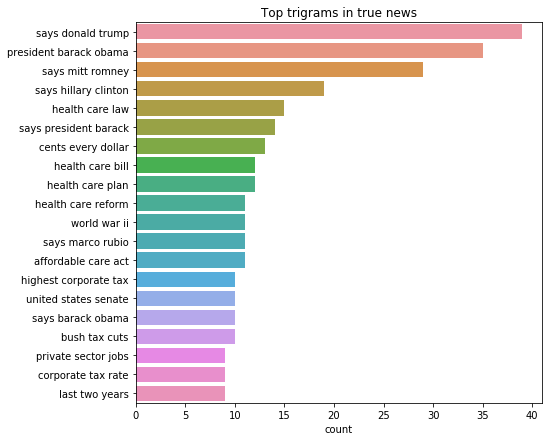

In [39]:
plt.figure(figsize=(16,7))
plt.subplot(121)
trigram_d = list(trigrams([w for w in word_tokenize(' '.join(liar_true['Title']).lower()) if 
              (w not in stopwords) & (w.isalpha()) & (len(w)>1)]))
d_fq = FreqDist(tg for tg in trigram_d)
tgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
tgdf_d.index = tgdf_d.index.map(lambda x: ' '.join(x))
tgdf_d = tgdf_d.sort_values('count',ascending=False)
sns.barplot(tgdf_d.head(20)['count'], tgdf_d.index[:20])
plt.title('Top trigrams in true news')
plt.show()

Cleaning the text data and processing it - Removing all punctuation and numbers, making all words lowercase and stemming

In [40]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [41]:
ps = PorterStemmer()
corpus_fake=[]
for i in range(0,len(fake)):
    review_data = re.sub('[^a-zA-Z]',' ',fake['Title'][i])    
    review_data = review_data.lower()
    review_data = review_data.split()
    
    review_data = [ps.stem(word) for word in review_data if not word in stopwords.words('english')]
    review_data = " ".join(review_data)
    corpus_fake.append(review_data)

In [42]:
ps = PorterStemmer()
corpus_true=[]
for i in range(0,len(true)):
    review_data = re.sub('[^a-zA-Z]',' ',true['Title'][i])    
    review_data = review_data.lower()
    review_data = review_data.split()
    
    review_data = [ps.stem(word) for word in review_data if not word in stopwords.words('english')]
    review_data = " ".join(review_data)
    corpus_true.append(review_data)

In [43]:
ps = PorterStemmer()
corpus_fake_liar=[]
for i in range(0,len(liar_fake)):
    review_data = re.sub('[^a-zA-Z]',' ',liar_fake['Title'][i])    
    review_data = review_data.lower()
    review_data = review_data.split()
    
    review_data = [ps.stem(word) for word in review_data if not word in stopwords.words('english')]
    review_data = " ".join(review_data)
    corpus_fake_liar.append(review_data)

In [44]:
ps = PorterStemmer()
corpus_true_liar = []
for i in range(0,len(liar_true)):
    review_data = re.sub('[^a-zA-Z]',' ',liar_true['Title'][i])    
    review_data = review_data.lower()
    review_data = review_data.split()
    
    review_data = [ps.stem(word) for word in review_data if not word in stopwords.words('english')]
    review_data = " ".join(review_data)
    corpus_true_liar.append(review_data)

In [45]:
fake['Title'] = corpus_fake

In [46]:
true['Title'] = corpus_true

In [47]:
liar_fake['Title'] = corpus_fake_liar 

In [48]:
liar_true['Title'] = corpus_true_liar

In [49]:
news = pd.concat([fake,true])
liar = pd.concat([liar_fake,liar_true])

In [50]:
news.reset_index(drop=True,inplace=True)
liar.reset_index(drop=True,inplace=True)

In [51]:
news.to_csv("news.csv",index=False)
liar.to_csv("liar.csv",index=False)

## Training on ISOT data and testing on Liar data

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),analyzer = 'word') 
X_isot = vectorizer.fit_transform(news['Title'])
X_liar = vectorizer.transform(liar['Title'])
y_isot = news['label']
y_liar = liar.Label.astype('int64')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
X_train_i,X_test_i,y_train_i,y_test_i = train_test_split(X_isot,y_isot)

In [54]:
model_nb_isot = MultinomialNB()
model_nb_isot.fit(X_train_i,y_train_i) 

MultinomialNB()

In [55]:
print(accuracy_score(y_test_i,model_nb_isot.predict(X_test_i)),accuracy_score(y_liar,model_nb_isot.predict(X_liar))) 

0.9457461024498887 0.5762698660018697


In [56]:
model_log_isot = LogisticRegression()
model_log_isot.fit(X_train_i,y_train_i)

LogisticRegression()

In [57]:
print(accuracy_score(y_test_i,model_log_isot.predict(X_test_i)),accuracy_score(y_liar,model_log_isot.predict(X_liar))) 

0.9436080178173719 0.5058429417263945


In [58]:
from sklearn.neighbors import KNeighborsClassifier
model_kn_isot = KNeighborsClassifier(n_neighbors=10)
model_kn_isot.fit(X_train_i,y_train_i)

KNeighborsClassifier(n_neighbors=10)

In [59]:
print(accuracy_score(y_test_i,model_kn_isot.predict(X_test_i)),accuracy_score(y_liar,model_kn_isot.predict(X_liar))) 

0.9053897550111358 0.5450296042380804


## Training on Liar data and testing on ISOT data

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,3),analyzer = 'word') 
X_liar = vectorizer.fit_transform(liar['Title'])
X_isot = vectorizer.transform(news['Title'])
y_isot = news['label'] 
y_liar = liar.Label.astype('int64')

In [61]:
X_train_l,X_test_l,y_train_l,y_test_l = train_test_split(X_liar,y_liar) 

In [62]:
model_nb_liar = MultinomialNB()
model_nb_liar.fit(X_train_l,y_train_l) 

MultinomialNB()

In [63]:
print(accuracy_score(y_test_l,model_nb_liar.predict(X_test_l)),accuracy_score(y_isot,model_nb_liar.predict(X_isot))) 

0.656590838267373 0.5229854336496058


In [64]:
model_log_liar = LogisticRegression()
model_log_liar.fit(X_train_l,y_train_l)

LogisticRegression()

In [65]:
print(accuracy_score(y_test_l,model_log_liar.predict(X_test_l)),accuracy_score(y_isot,model_log_liar.predict(X_isot))) 

0.6615768152072297 0.5225177068020848


In [66]:
model_kn_liar = KNeighborsClassifier(n_neighbors=5)
model_kn_liar.fit(X_train_l,y_train_l)

KNeighborsClassifier()

In [67]:
print(accuracy_score(y_test_l,model_kn_liar.predict(X_test_l)),accuracy_score(y_isot,model_kn_liar.predict(X_isot))) 

0.6170146463072609 0.5258808855628313
